In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import ScalarFormatter

In [2]:
df=pd.read_csv('C:/Users/Bao Tram/Documents/Data/Wholesale_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.Region.unique()

array([3, 1, 2], dtype=int64)

In [7]:
df.shape

(440, 8)

In [10]:
df.Channel.replace(2,0,inplace=True) #1: Horeca, 0:Retail
df.Region.replace({1:-1,2:0,3:1}, inplace=True) #-1:Lisbon, 0:Oporto, 1:Others

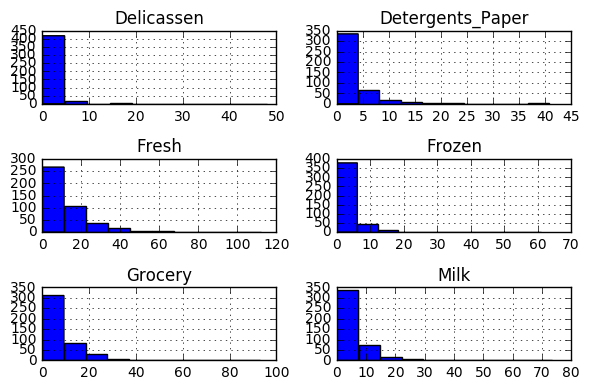

In [11]:
df1=df.drop(['Region','Channel'],axis=1)
df0=df1
df0=(df0.values/1000).round(2)
df0=pd.DataFrame(df0, columns=df1.columns)
df0.hist()
plt.tight_layout()

In [12]:
df_log=np.log(df1)
df_log=pd.DataFrame(df_log)
#df_log=df_log.round(2)
df_log.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


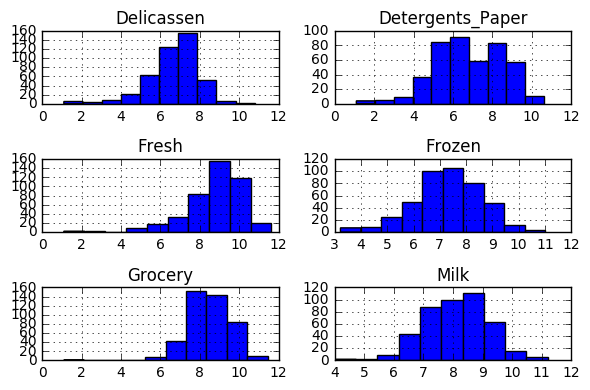

In [13]:
df_log.hist()
plt.tight_layout()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_log)

In [15]:
df_scale

array([[ 0.48456094,  0.97606958,  0.43913249, -1.50841768,  0.6430006 ,
         0.40768457],
       [ 0.08876643,  0.99071847,  0.65029061,  0.13468306,  0.76412675,
         0.62396715],
       [ 0.01768032,  0.89097001,  0.45360621,  0.37714691,  0.80224343,
         1.75841957],
       ..., 
       [ 0.57731479,  1.41350165,  1.68252476, -0.95197733,  1.63994942,
         0.66213078],
       [ 0.343877  , -0.49039206, -0.65522803, -0.27772612, -0.96681026,
         0.76098885],
       [-0.53965722, -0.63310622, -0.54994107, -2.43711211, -0.35976309,
        -2.07271367]])

In [16]:
df2=pd.DataFrame(df_scale)
df2.columns=df1.columns
df3=df2.join(df[['Channel','Region']])

In [17]:
df3.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685,0,-1
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967,0,-1
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420,0,-1
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110,1,-1
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246,0,-1


In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df2)
    scores.append(metrics.silhouette_score(df2, km.labels_))

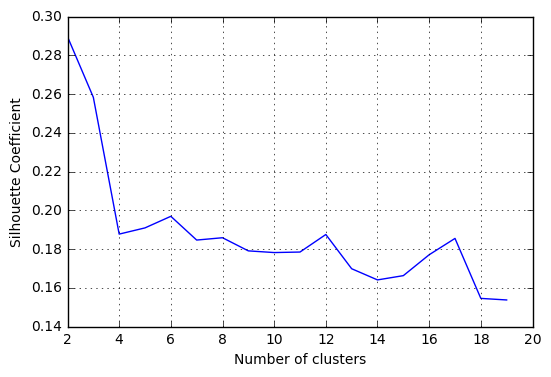

In [19]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [20]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(df2)
# save the cluster labels and sort by cluster
df2['cluster'] = km.labels_
df2.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,0.218190,-0.606251,-0.642083,0.259537,-0.662475,-0.147432
1,-0.289766,0.805127,0.852714,-0.344676,0.879795,0.195795


In [21]:
df2=df2.join(df[['Channel','Region']])
df['cluster']=df2['cluster']

In [22]:
df2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Channel,Region
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685,1,0,-1
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967,1,0,-1
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420,1,0,-1
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110,0,1,-1
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246,1,0,-1


In [23]:
df2.groupby(['cluster','Channel']).size()

cluster  Channel
0        0            7
         1          244
1        0          135
         1           54
dtype: int64

In [24]:
df2.groupby(['cluster','Region']).size()

cluster  Region
0        -1        223
          0         28
1        -1        170
          0         19
dtype: int64

In [25]:
df.groupby('cluster').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,0.972112,-0.888446,13958.816733,2396.633466,2911.780876,3716.215139,486.721116,1039.517928
1,0.285714,-0.899471,9399.301587,10311.121693,14643.941799,2216.296296,6061.851852,2169.439153


* Cluster 0: Fresh and frozen products. Horeca channel.
* Cluster 1: Buy mainly detergent papers, groceries, and milk. Buy delicassen more than group 0 but not much. Retail channel.